In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from google.colab import drive
import os

In [2]:
drive.mount('/content/drive')
print(os.getcwd())
os.chdir(os.getcwd() + '/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive
/content


# 1. Data Processing

Data collection and load

In [3]:
df = pd.read_csv('datasets/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [41]:
X = df.iloc[:,[0]].to_numpy()
y = df.iloc[:,[1]].to_numpy().flatten()

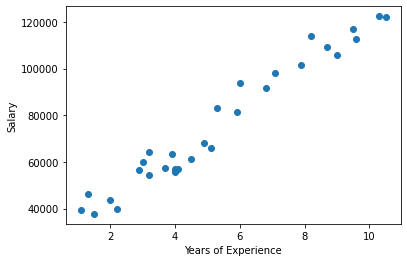

In [42]:
plt.scatter(X, y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# 2. Tuning Parameter

In [43]:
model = SVR()

parameters = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

grid_search = GridSearchCV(model, parameters)

grid_search.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


# 3. Data Modelling

In [44]:
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X, y)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# 4. Data Evaluation

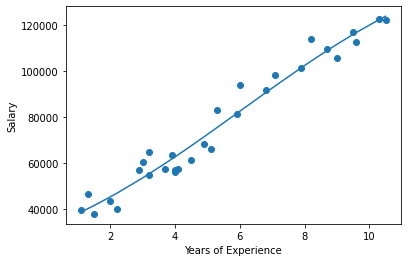

In [52]:
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [59]:
print('R-Squared value of the model', model_baru.score(X, y))

R-Squared value of the model 0.9610212564451518
